<a href="https://colab.research.google.com/github/SH22Hwang/KoGES_OP/blob/master/OsteoPorosis_2023_03_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 골다공증 분석 모델

골다공증 판단 조건

- AS1_MT <= -2.5
- AS1_DT <= -2.5

**@author: sh22h**


## 학습 모델

- 0차 - 2023-03-16
  - 고혈압 분석 모델 2022-09-19에서 계승
  - 독립변수 너무 많음


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## dataset 불러오기 and 분리
- train, test

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PreProcessed/OP_X_230316.csv', index_col=0)
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PreProcessed/OP_y_230316.csv', index_col=0)

In [ ]:
X

,AS1_SEX,AS1_PDHT,AS1_PDDM,AS1_PDUL,AS1_PDAL,AS1_PDMI,AS1_PDTH,AS1_PDCH,AS1_PDCD,AS1_PDLP,...,AS1_TRTTOTCA1NA_유방암 수술후 항암치료,AS1_TRTTOTCA1NA_유방암으로 2년째 치료중(병원치료),AS1_TRTTOTCA1NA_자궁근종,AS1_TRTTOTCA1NA_자궁암이후 호르몬치료,AS1_TRTTOTCA1NA_자궁혹,AS1_TRTTOTCA1NA_췌장암,AS1_TRTTOTCA1NA_췌장암(항암치료),AS1_TRTTOTCA1NA_폐림프종,AS1_TRTTOTCA1NA_폐암,AS1_TRTTOTCA1NA_폐암절제수술
RID,,,,,,,,,,,,,,,,,,,,,
EPI20_026_3_000001,1.0,0.422923,0.466466,0.393894,0.472973,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_3_000002,0.0,0.422923,0.466466,0.393894,0.472973,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_3_000003,0.0,0.422923,0.466466,1.000000,1.000000,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_3_000004,0.0,0.422923,0.466466,0.393894,0.472973,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_3_000005,0.0,0.422923,0.466466,0.393894,0.472973,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI20_026_3_010026,1.0,0.422923,0.466466,1.000000,1.000000,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_3_010027,0.0,0.422923,1.000000,0.393894,0.472973,0.495495,1.000000,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_3_010028,0.0,0.422923,0.466466,0.393894,0.472973,0.495495,0.485485,0.498999,0.495996,0.487988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7280, 1415) (1820, 1415) (7280, 1) (1820, 1)


In [ ]:
print(f"""샘플링 전:

전체 데이터 개수: {len(y)}
전체 데이터 pos: {(y == 1).sum()}
전체 데이터 neg: {(y == 0).sum()}

train 데이터 개수: {len(y_train)}
train 데이터 pos: {(y_train == 1).sum()}
train 데이터 neg: {(y_train == 0).sum()}

test 데이터 개수: {len(y_test)}
test 데이터 pos: {(y_test == 1).sum()}
test 데이터 neg: {(y_test == 0).sum()}
""")

샘플링 전:

전체 데이터 개수: 9100
전체 데이터 pos: OP    1013
dtype: int64
전체 데이터 neg: OP    8087
dtype: int64

train 데이터 개수: 7280
train 데이터 pos: OP    813
dtype: int64
train 데이터 neg: OP    6467
dtype: int64

test 데이터 개수: 1820
test 데이터 pos: OP    200
dtype: int64
test 데이터 neg: OP    1620
dtype: int64



## sampling

OverSampling, UnderSampling

참고자료: https://ek-koh.github.io/data%20analysis/imbalanced/

- 언더 샘플링(Undersampling
  - 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소시키는 기법
  - ROS 사용
    - 설명: https://imbalanced-learn.org/stable/under_sampling.html

- 오버 샘플링(Oversampling)
  - 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 학습에 충분한 데이터를 확보하는 기법
  - 오버 샘플링 방식이 일반적으로 언더 샘플링보다 예측 성능이 더 유리함
  - SMOTE 사용
    - 설명: https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn

### 테스트 결과

- UnderSampling
 -

- OverSampling
  - Training error: 0.316
  - Accuracy: 0.684
  - sensitivity: 0.721
  - specificity: 0.647

### 결론

1. 샘플링하지 않고 사용.
2. 편향된 데이터에 맞춘 딥러닝 모델 재설계

In [ ]:
from imblearn.under_sampling import NearMiss

# nm1 = NearMiss(version=3)

# # 클래스 불균형 처리를 해주는 imbalanced-learn를 호출
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=415)  # over

In [ ]:
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)
# X_sampled, y_sampled = nm1.fit_resample(X_train, y_train)

print("샘플링 전:", (y == 0).sum(), (y == 1).sum())

print(f"""
전체 데이터 개수: {len(y)}
전체 데이터 pos: {(y == 1).sum()}
전체 데이터 neg: {(y == 0).sum()}

train 데이터 개수: {len(y_sampled)}
train 데이터 pos: {(y_sampled == 1).sum()}
train 데이터 neg: {(y_sampled == 0).sum()}

test 데이터 개수: {len(y_test)}
test 데이터 pos: {(y_test == 1).sum()}
test 데이터 neg: {(y_test == 0).sum()}
""")

샘플링 전: 6266 1883

전체 데이터 개수: 8149
전체 데이터 pos: 1883
전체 데이터 neg: 6266

train 데이터 개수: 10016
train 데이터 pos: 5008
train 데이터 neg: 5008

test 데이터 개수: 1630
test 데이터 pos: 372
test 데이터 neg: 1258



In [ ]:
X_train, y_train = X_sampled, y_sampled
print("샘플링 전:", (y == 0).sum(), (y == 1).sum())

print(f"""
전체 데이터 개수: {len(y)}
전체 데이터 pos: {(y == 1).sum()}
전체 데이터 neg: {(y == 0).sum()}

train 데이터 개수: {len(y_train)}
train 데이터 pos: {(y_train == 1).sum()}
train 데이터 neg: {(y_train == 0).sum()}

test 데이터 개수: {len(y_test)}
test 데이터 pos: {(y_test == 1).sum()}
test 데이터 neg: {(y_test == 0).sum()}
""")

샘플링 전: 6266 1883

전체 데이터 개수: 8149
전체 데이터 pos: 1883
전체 데이터 neg: 6266

train 데이터 개수: 10016
train 데이터 pos: 5008
train 데이터 neg: 5008

test 데이터 개수: 1630
test 데이터 pos: 372
test 데이터 neg: 1258



## Tuning

In [ ]:
import IPython

!pip install -U keras-tuner
import kerastuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


<ipython-input-8-904b7ce66818>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
from kerastuner import HyperModel, Objective

class RegressionHyperModel(HyperModel):
  def __init__(self, input_shape):
    self.input_shape = input_shape

class ClearTrainingOutput(Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
# class ClearTrainingOutput(keras.callbacks.Callback):
#   def on_train_end(*args, **kwargs):
#     IPython.display.clear_output(wait = True)

# 검증 데이터 손실이 5회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
es = EarlyStopping(monitor='', mode='min', verbose=1, patience=5)

# 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

rc = Recall()

In [ ]:
def model_builder(hp):
  model = Sequential()
  # model.add(Dense(12, input_dim=61, activation='relu'))

  # # Tune the number of units in the first Dense layer
  # # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 4, max_value = 256, step = 4)

  model.add(
      Dense(units = hp_units, activation='relu'))

  model.add(Dropout(0.01))
  model.add(
      Dense(units = hp_units, activation='relu'))

  model.add(Dropout(0.01))
  model.add(
      Dense(units = hp_units, activation='relu'))

  # model.add(Dropout(0.01))
  # model.add(
  #     Dense(units = hp_units, activation='relu'))

  # model.add(Dropout(0.01))
  # model.add(
  #     Dense(units = hp_units, activation='relu'))

  # model.add(Dropout(0.01))
  # model.add(
  #     Dense(units = hp_units, activation='relu'))

  # model.add(Dropout(0.01))
  # model.add(
  #     Dense(units = hp_units, activation='relu'))

  # model.add(Dropout(0.01))
  # model.add(
  #     Dense(units = hp_units, activation='relu'))

  model.add(Dense(1, activation='sigmoid')) # 출력층

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss="binary_crossentropy",
                metrics = ['accuracy']
                # metrics = ['binary_accuracy']
                # metrics = ['binary_accuracy', rc])
                )
  # model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

  return model

In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

# tuner = kt.RandomSearch(model_builder,
#                     #  objective = 'val_accuracy',
#                      objective = Objective("val_sensitivity", direction="max"),
#                       # objective = 'Recall',
#                      max_epochs = 256,
#                      hyperband_iterations=128,
#                      directory = './',
#                      project_name = 'HyperTension_220919_16')

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                    #  objective = Objective(rc, direction="max"),
                      # objective = 'Recall',
                     max_epochs = 256,
                     hyperband_iterations=128,
                     directory = './',
                     project_name = 'HyperTension_220919_18')

In [ ]:
tuner.search(X_train, y_train,
             validation_data = (X_test, y_test),
             epochs = 256,
             callbacks = [ClearTrainingOutput(), es])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(f"""The hyperparameter search is complete.
units: {best_hps.get('units')}
learning rate: {best_hps.get('learning_rate')}
""")

Trial 231 Complete [00h 00m 06s]
val_accuracy: 0.8901098966598511

Best val_accuracy So Far: 0.8906593322753906
Total elapsed time: 00h 25m 28s

Search: Running Trial #232

Value             |Best Value So Far |Hyperparameter
88                |208               |units
0.0001            |0.0001            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
5                 |5                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: ignored

In [ ]:
print(best_hps.values)

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
# model = tuner.hypermodel.build(best_hps)
# model.fit(X_train, y_train, epochs=512, verbose=0, validation_split=0.2, callbacks=es)
model.build(input_shape=X.shape)
scores = model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7822


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
model.summary()

accuracy: 78.22%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               11284     
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense_1 (Dense)             (None, 124)               15500     
                                                                 
 dropout_1 (Dropout)         (None, 124)               0         
                                                                 
 dense_2 (Dense)             (None, 124)               15500     
                                                                 
 dense_3 (Dense)             (None, 1)                 125       
                                                                 
Total params: 42,409
Trainable params: 

## DNN

In [ ]:
UNITS = 24
EPOCH = 128
DROPOUT = 0.05
LEARNINGRATE = 0.001

# 검증 데이터 손실이 3회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(UNITS, activation='relu'))  # input layer requires input_dim param

model.add(Dropout(DROPOUT))
model.add(Dense(UNITS, activation='relu'))

model.add(Dropout(DROPOUT))
model.add(Dense(UNITS, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1

model.compile(loss="binary_crossentropy",
              optimizer = Adam(learning_rate = LEARNINGRATE),
              metrics=[Recall()])

history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2, callbacks=es)
scores = model.evaluate(X_test, y_test)

Epoch 15: early stopping
51/51 [==============================] - 0s 2ms/step - loss: 0.5664 - recall_3: 0.5161


## 민감도 특이도

2022-09-06 추가

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
y_pred_r = model.predict(X_test)
y_pred_r = np.reshape(y_pred_r, len(y_pred_r))
y_pred = np.where(y_pred_r <= 0.5, 0, 1)
(y_pred == 1).sum()

473

In [ ]:
cm = confusion_matrix(y_test, y_pred)
scores = {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}
# scores['tn'] -= 50
# scores['fp'] += 50
print(scores)
# print((scores['tp'] + scores['tn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp']))

{'tn': 977, 'fp': 281, 'fn': 180, 'tp': 192}


In [ ]:
print("Training error:", ((scores['fp'] + scores['fn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp']) * 100).round(3),
      "\nAccuracy:", ((scores['tp'] + scores['tn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp']) * 100).round(3),)
print('sensitivity:', (scores['tp'] / (scores['tp'] + scores['fn'])).round(3), # recall
      '\nspecificity:', (scores['tn'] / (scores['fp'] + scores['tn'])).round(3))
print("f1:", f1_score(y_test, y_pred).round(3))

Training error: 28.282 
Accuracy: 71.718
sensitivity: 0.516 
specificity: 0.777
f1: 0.454


## feature importance

## feature importance


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=10)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred_r = tree_model.predict(X_test)
y_pred_r = np.reshape(y_pred_r, len(y_pred_r))
y_pred = np.where((y_pred_r < 0.5), 0, 1)
(y_pred == 1).sum()

472

In [ ]:
cm = confusion_matrix(y_test, y_pred)
scores = {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}
print(scores)
print("Training error:", ((scores['fp'] + scores['fn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp'])*100).round(3),
      "\nACC:",((scores['tp'] + scores['tn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp'])*100).round(3) )
print('sensitivity:', (scores['tp'] / (scores['tp'] + scores['fn'])).round(3), # recall
      '\nspecificity:', (scores['tn'] / (scores['fp'] + scores['tn'])).round(3))
print("f1:", f1_score(y_test, y_pred).round(3))

{'tn': 954, 'fp': 304, 'fn': 204, 'tp': 168}
Training error: 31.166 
ACC: 68.834
sensitivity: 0.452 
specificity: 0.758
f1: 0.398


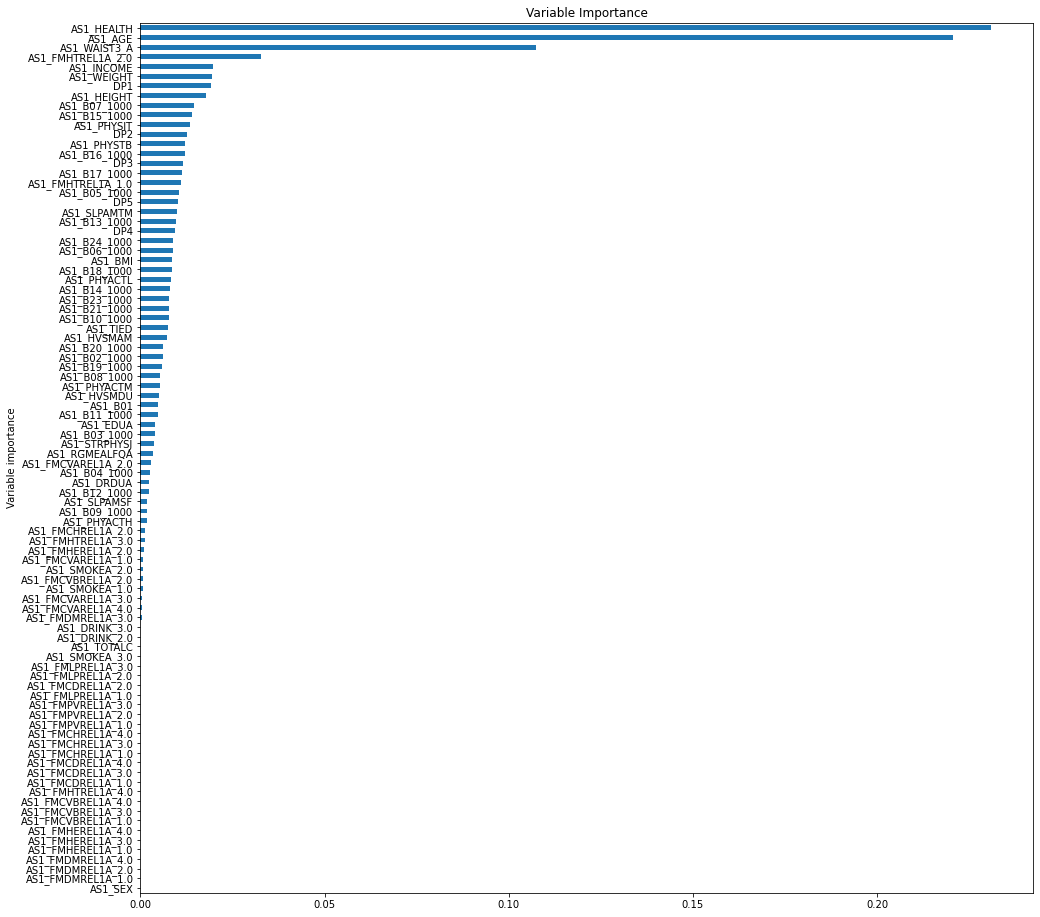

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
# tree_importances = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values()
tree_importances = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values()
tree_importances.plot(kind="barh",
                      title="Variable Importance",
                      ylabel="Variable importance" ,ax=ax)
# ax.set_title("HyperTension feature importance with all variable")
# ax.set_ylabel("feature importance")

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# Define hyperparameters
params_xgb = {"max_depth": 5,
              "eta": 0.1,
              'objective': 'binary:logistic',
              'eval_metric':'logloss',
              'early_stopping': 32
              }

num_round = 400

In [ ]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params=params_xgb, dtrain=dtrain, num_boost_round=num_round, evals=wlist)

[0]	train-logloss:0.655797	eval-logloss:0.657993
[1]	train-logloss:0.625202	eval-logloss:0.629215
[2]	train-logloss:0.599602	eval-logloss:0.60556
[3]	train-logloss:0.577548	eval-logloss:0.5858
[4]	train-logloss:0.558783	eval-logloss:0.569326
[5]	train-logloss:0.54279	eval-logloss:0.555244
[6]	train-logloss:0.528989	eval-logloss:0.543092
[7]	train-logloss:0.517137	eval-logloss:0.533108
[8]	train-logloss:0.50627	eval-logloss:0.525245
[9]	train-logloss:0.49717	eval-logloss:0.51813
[10]	train-logloss:0.488698	eval-logloss:0.511816
[11]	train-logloss:0.481177	eval-logloss:0.506475
[12]	train-logloss:0.474533	eval-logloss:0.502486
[13]	train-logloss:0.468363	eval-logloss:0.498906
[14]	train-logloss:0.463131	eval-logloss:0.495114
[15]	train-logloss:0.457597	eval-logloss:0.491801
[16]	train-logloss:0.452784	eval-logloss:0.489489
[17]	train-logloss:0.448929	eval-logloss:0.487052
[18]	train-logloss:0.444884	eval-logloss:0.485466
[19]	train-logloss:0.441575	eval-logloss:0.484147
[20]	train-loglos

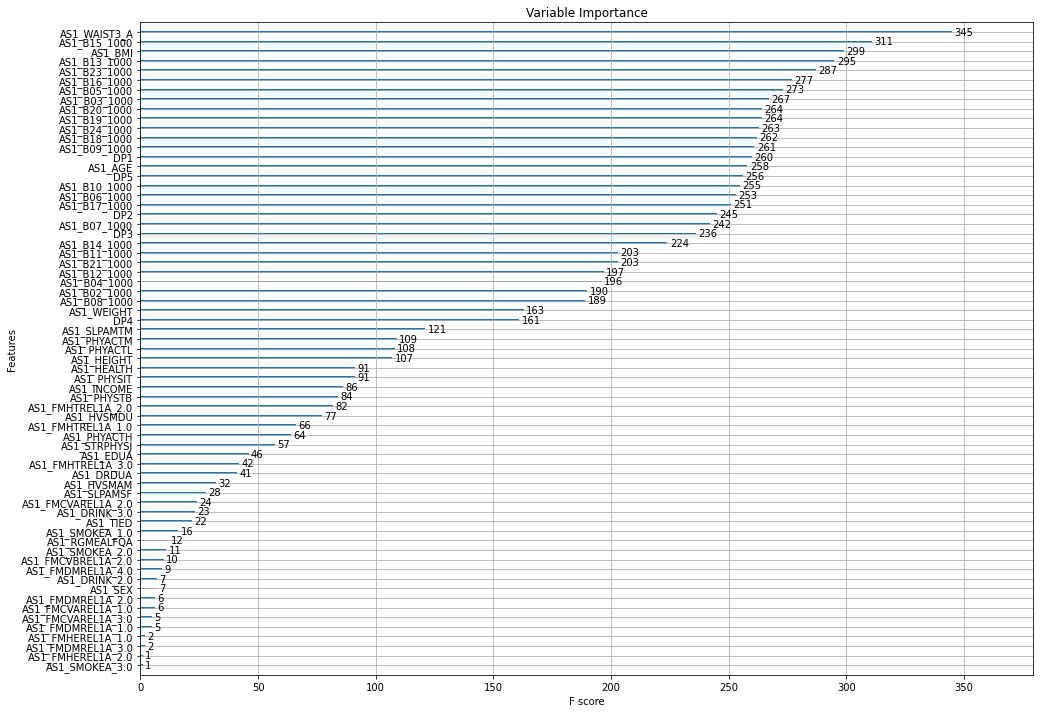

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))
plot_importance(xgb_model, title="Variable Importance", ax=ax)